Normal Vector: [-0.07517703 -0.91758256 -0.39037247]
Centroid of the Plane: [-1.630828  0.64853   0.336774]
Angle θ between normal and vector to point: 94.19 degrees


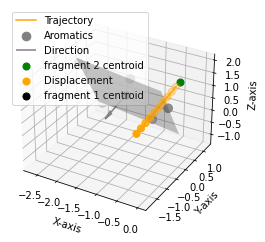

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to calculate the normal vector using PCA on any number of points (>=3)
def get_norm_arom_plane(c_coords, tolerance=1e-1):
    if len(c_coords) < 3:
        raise ValueError("At least 3 points are required to define a plane.")
    
    # Calculate the centroid
    centroid = calculate_centroid(c_coords)
    
    # Subtract the centroid from the points (centering the points)
    centered_points = c_coords - centroid
    
    # Compute the covariance matrix of the centered points
    covariance_matrix = np.cov(centered_points.T)
    
    # Perform eigen-decomposition to find the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # The normal vector to the plane is the eigenvector corresponding to the smallest eigenvalue
    normal = eigenvectors[:, np.argmin(eigenvalues)]
    
    # Normalize the normal vector
    normal /= np.linalg.norm(normal)
    
    return normal, centroid

# Function to calculate the centroid (middle point) of the plane formed by points
def calculate_centroid(c_coords):
    centroid = np.mean(c_coords, axis=0)
    return centroid

# Function to displace a point along a normal direction
def displace_centroid_along_normal(centroid_f2, normal, step, k):
    displaced_points = []
    for i in range(k):
        displaced_point = centroid_f2 + normal * step * (i + 1)
        displaced_points.append(displaced_point)
    return np.array(displaced_points)

# Function to calculate the angle theta between the normal and the vector to the point
def calculate_angle_between_vectors(normal, vector_to_point):
    dot_product = np.dot(normal, vector_to_point)
    norm_normal = np.linalg.norm(normal)
    norm_vector_to_point = np.linalg.norm(vector_to_point)
    
    # Calculate cosine of theta
    cos_theta = dot_product / (norm_normal * norm_vector_to_point)
    
    # Calculate angle in radians, then convert to degrees
    theta = np.arccos(cos_theta)  # in radians
    theta_degrees = np.degrees(theta)  # in degrees
    
    return theta_degrees

# Plot the molecule, plane, and normal vectors
def plot_molecule_and_plane(c_coord, normal, centroid, centroid_f2, displaced_points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    points = np.array(c_coord)
    
    # Plot the points representing the atoms
    ax.scatter(c_coord[:, 0], c_coord[:, 1], c_coord[:, 2], color='grey', s=75, label='Aromatics')
    
    # Plot the plane (a rough approximation using centroid and normal)
    point  = centroid
    d = -point.dot(normal)  # Plane equation: ax + by + cz + d = 0
    
    # Create a grid of points to plot the plane
    xx, yy = np.meshgrid(np.linspace(min(c_coord[:, 0]), max(c_coord[:, 0]), 10),
                         np.linspace(min(c_coord[:, 1]), max(c_coord[:, 1]), 10))
    zz = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    
    ax.plot_surface(xx, yy, zz, color='grey', alpha=0.3, rstride=100, cstride=100)

    # Plot the normal vector for the plane
    ax.quiver(centroid[0], centroid[1], centroid[2], 
              normal[0], normal[1], normal[2], length=1.0, color='grey', label='Direction')
    
    # Plot the centroid above the plane
    ax.scatter(centroid_f2[0], centroid_f2[1], centroid_f2[2], color='green', s=50, label='fragment 2 centroid')

    # Plot the displaced points along the normal direction
    displaced_points = np.array(displaced_points)
    ax.scatter(displaced_points[:, 0], displaced_points[:, 1], displaced_points[:, 2], color='orange', s=50, label='Displacement')
    
    # Plot the trajectory of the displaced points
    ax.plot(displaced_points[:, 0], displaced_points[:, 1], displaced_points[:, 2], color='orange', label='Trajectory')
    
    # Plot centroid of the points
    ax.scatter(centroid[0], centroid[1], centroid[2], color='k', s=50, label='fragment 1 centroid')
    
    # Set plot labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # Add legend and show plot
    ax.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Input: 5 or 6 points in 3D space (x, y, z), all lying on the same plane (z = 0)
    points_6 = np.array([
        [-0.51724, 0.54821, 0.35582],  # Carbon atom positions on a hexagonal plane
        [-1.15680, 1.08010, -0.76605],
        [-2.54090, 1.20110, -0.78853],
        [-3.29528, 0.79560, 0.30810],
        [-2.66210, 0.26887, 1.42834],
        [-1.27710, 0.14437, 1.45429]
    ])

    points_5 = np.array([
        [-0.51724, 0.54821, 0.35582],  # Carbon atom positions on a pentagonal plane
        [-1.15680, 1.08010, -0.76605],
        [-2.54090, 1.20110, -0.78853],
        [-2.66210, 0.26887, 1.42834],
        [-1.27710, 0.14437, 1.45429]
    ])
    
    # Point above the plane
    point_above_plane = np.array([0.0, 0.0, 2.0])
    
    try:
        # Select points: use either points_6 or points_5
        points = points_5  # Choose points_6 for 6-point example
        
        # Calculate the normal vectors and centroid of the plane
        normal, centroid = get_norm_arom_plane(points)
        
        # Output the normal vector direction
        print(f"Normal Vector: {normal}")
        print(f"Centroid of the Plane: {centroid}")
        
        # Compute the vector from the centroid to the point above the plane
        vector_to_point = point_above_plane - centroid
        
        # Calculate the angle between the normal and the vector to the point
        theta = calculate_angle_between_vectors(normal, vector_to_point)
        print(f"Angle θ between normal and vector to point: {theta:.2f} degrees")
        
        # Displace the point above the plane along the normal direction
        step = 0.2  # Displacement step size
        k = 10      # Number of times to displace the point
        displaced_points = displace_centroid_along_normal(point_above_plane, normal, step, k)
        
        # Plot the molecule, plane, normal vectors, and displaced points
        plot_molecule_and_plane(points, normal, centroid, point_above_plane, displaced_points)
        
    except ValueError as e:
        print(e)
